In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
from sklearn import preprocessing
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, confusion_matrix
%matplotlib inline

In [28]:
data = pd.read_csv('/content/first inten project.csv')

In [3]:
data.head()

,Booking_ID,number of adults,number of children,number of weekend nights,number of week nights,type of meal,car parking space,room type,lead time,market segment type,repeated,P-C,P-not-C,average price,special requests,date of reservation,booking status
0,INN00001,1,1,2,5,Meal Plan 1,0,Room_Type 1,224,Offline,0,0,0,88.00,0,10/2/2015,Not_Canceled
1,INN00002,1,0,1,3,Not Selected,0,Room_Type 1,5,Online,0,0,0,106.68,1,11/6/2018,Not_Canceled
2,INN00003,2,1,1,3,Meal Plan 1,0,Room_Type 1,1,Online,0,0,0,50.00,0,2/28/2018,Canceled
3,INN00004,1,0,0,2,Meal Plan 1,0,Room_Type 1,211,Online,0,0,0,100.00,1,5/20/2017,Canceled
4,INN00005,1,0,1,2,Not Selected,0,Room_Type 1,48,Online,0,0,0,77.00,0,4/11/2018,Canceled


In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 36285 entries, 0 to 36284
Data columns (total 17 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Booking_ID                36285 non-null  object 
 1   number of adults          36285 non-null  int64  
 2   number of children        36285 non-null  int64  
 3   number of weekend nights  36285 non-null  int64  
 4   number of week nights     36285 non-null  int64  
 5   type of meal              36285 non-null  object 
 6   car parking space         36285 non-null  int64  
 7   room type                 36285 non-null  object 
 8   lead time                 36285 non-null  int64  
 9   market segment type       36285 non-null  object 
 10  repeated                  36285 non-null  int64  
 11  P-C                       36285 non-null  int64  
 12  P-not-C                   36285 non-null  int64  
 13  average price             36285 non-null  float64
 14  specia

In [5]:
data.shape

(36285, 17)

In [6]:
data.isnull().sum()

,0
Booking_ID,0
number of adults,0
number of children,0
number of weekend nights,0
number of week nights,0
type of meal,0
car parking space,0
room type,0
lead time,0
market segment type,0


In [7]:
data.columns

Index(['Booking_ID', 'number of adults', 'number of children',
       'number of weekend nights', 'number of week nights', 'type of meal',
       'car parking space', 'room type', 'lead time', 'market segment type',
       'repeated', 'P-C', 'P-not-C', 'average price ', 'special requests',
       'date of reservation', 'booking status'],
      dtype='object')

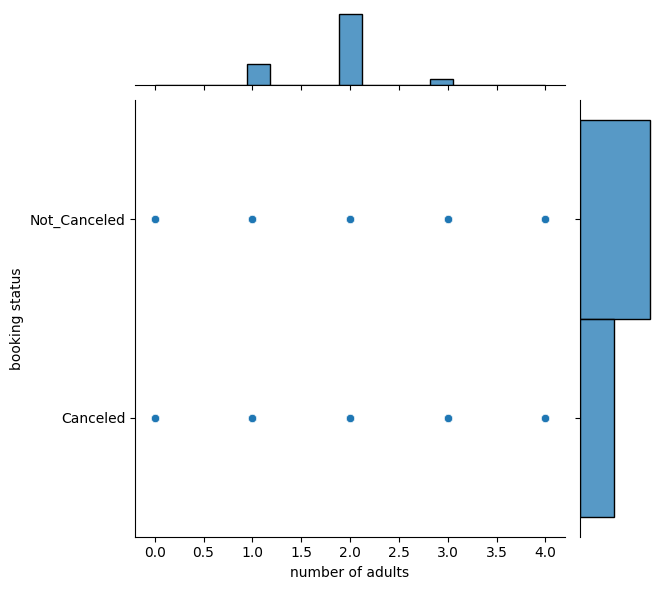

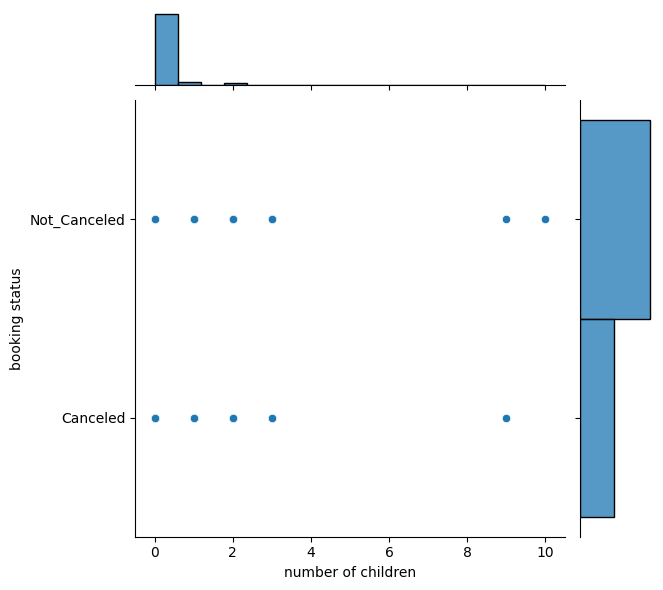

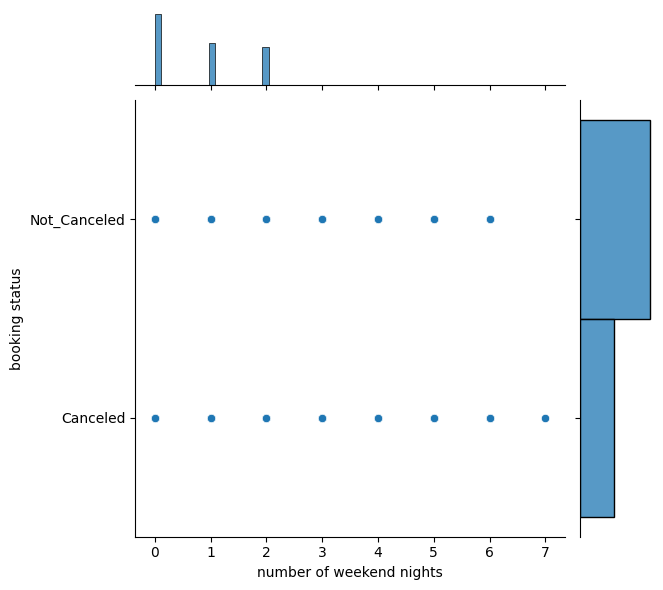

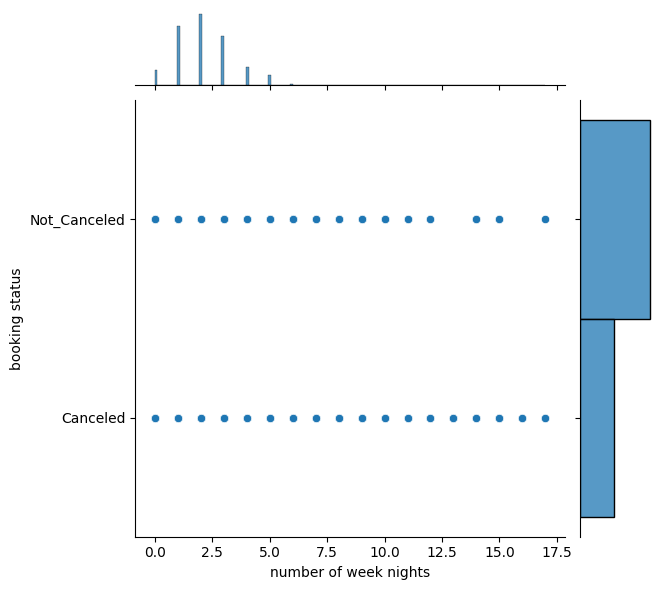

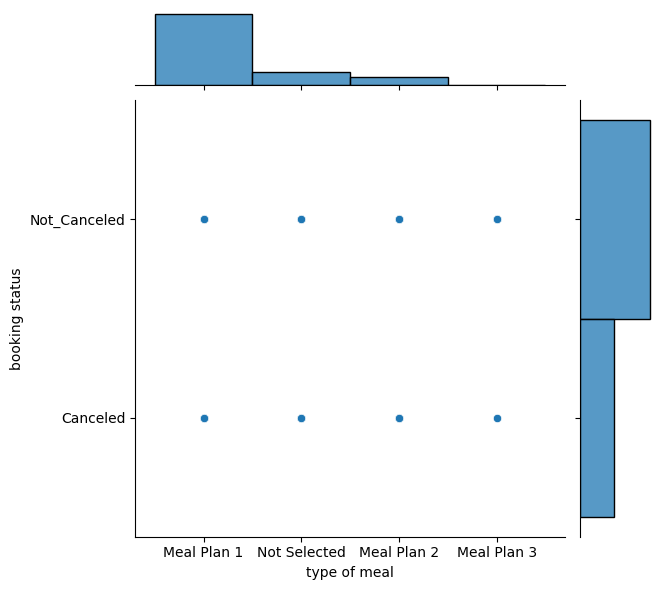

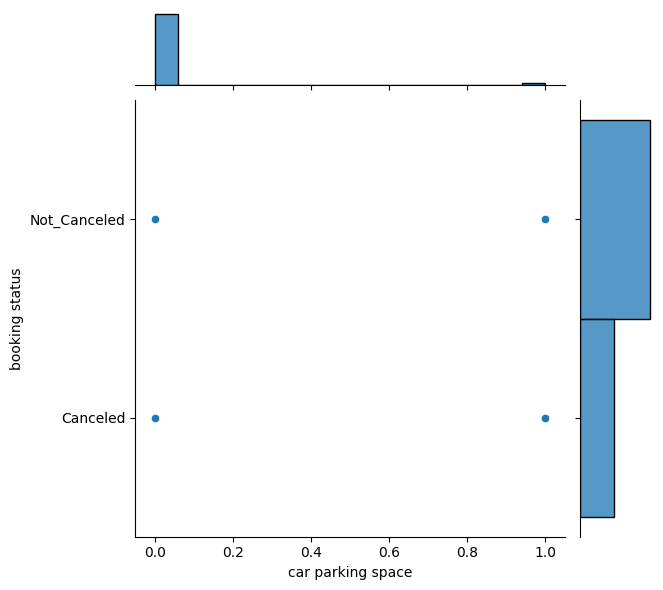

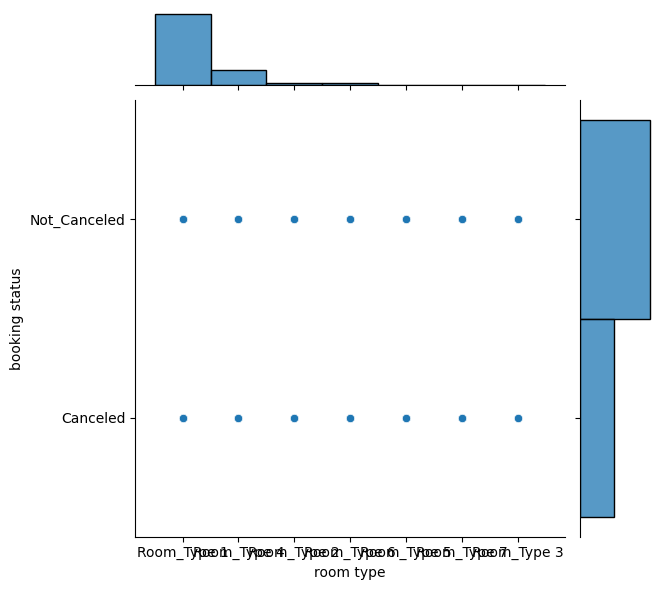

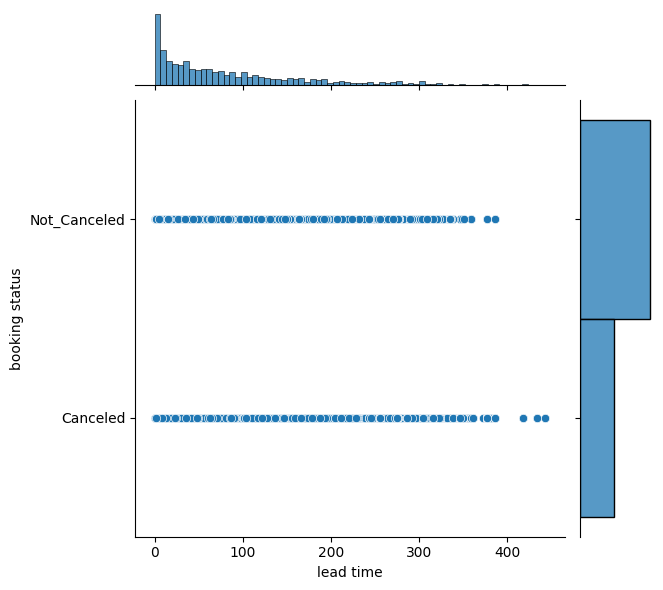

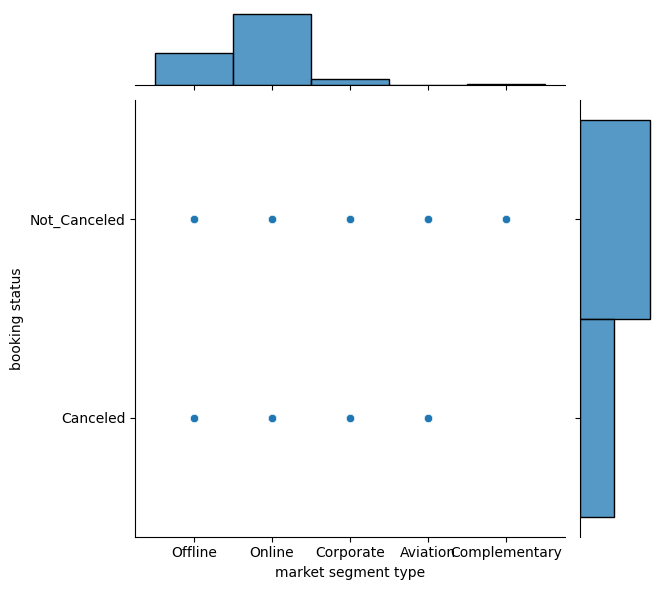

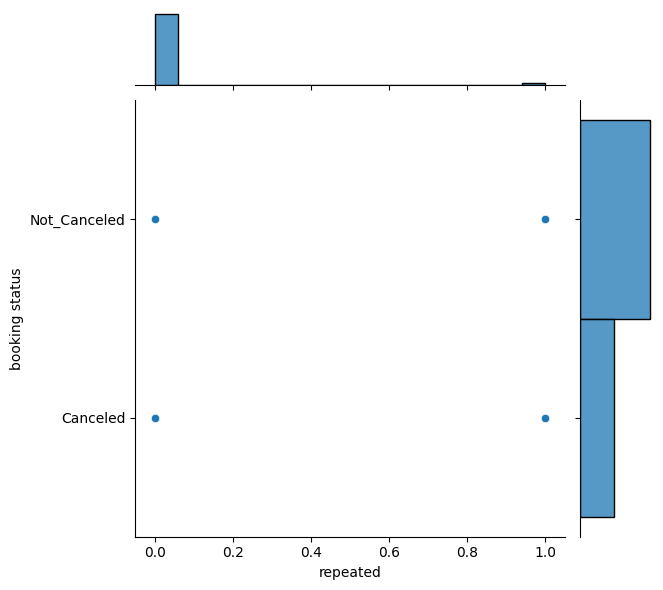

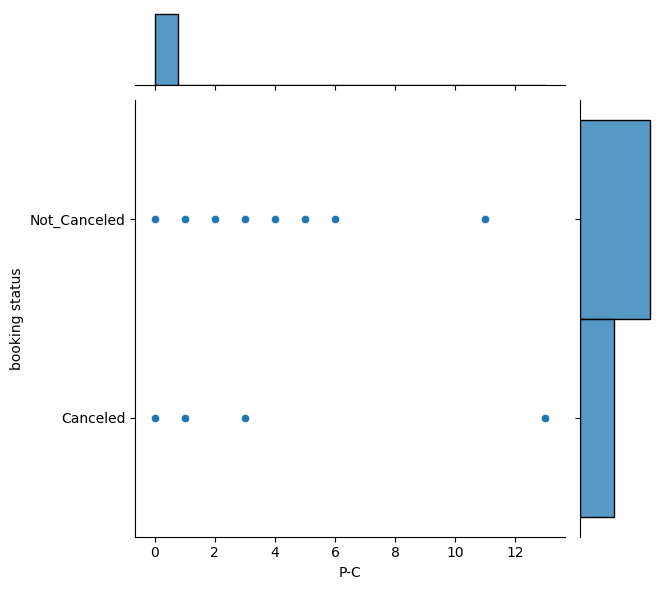

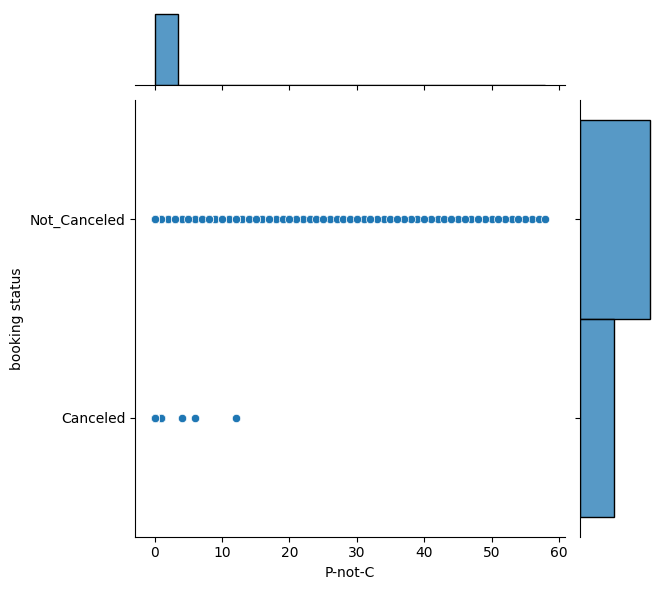

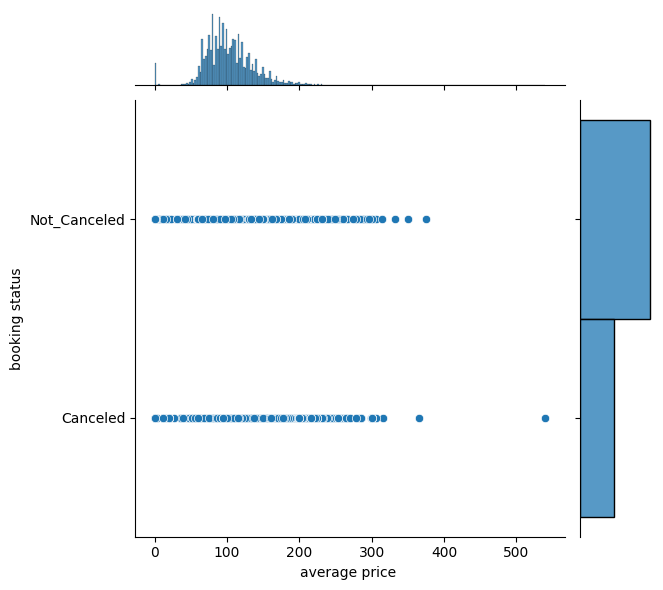

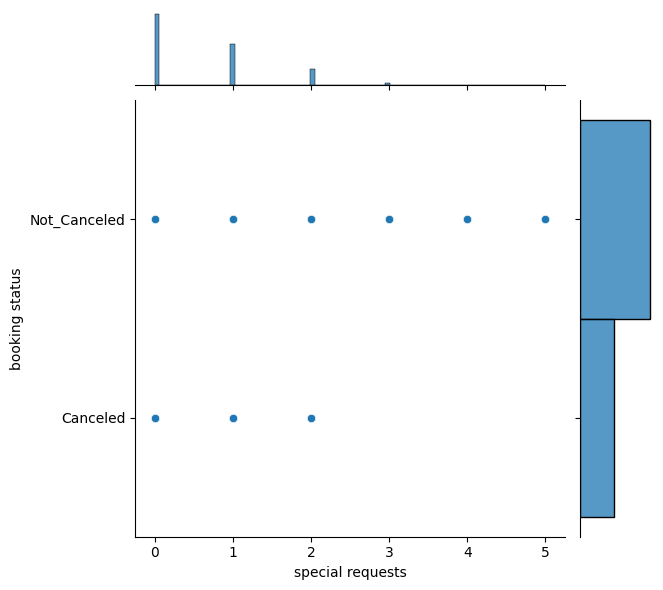

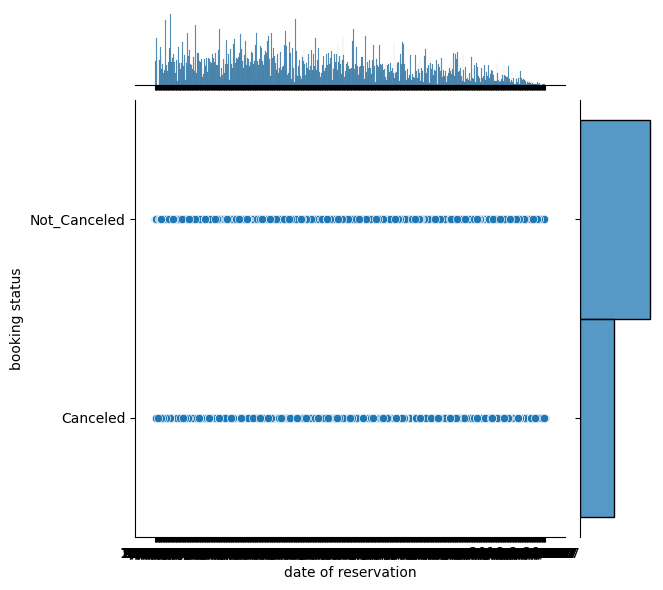

In [ ]:
for i in data.columns[1:-1]:
  sns.jointplot(x=i, y=data.columns[-1], data=data)

<Axes: >

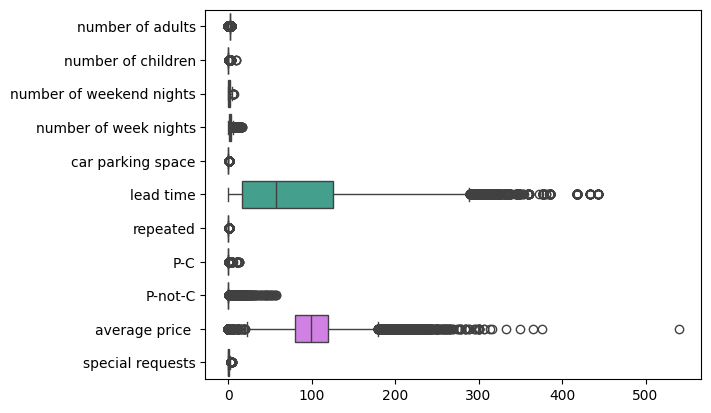

In [ ]:
sns.boxplot(data=data, orient='h')

In [8]:
y = data[['booking status']]
data = data[['number of adults', 'number of children',
       'number of weekend nights', 'number of week nights', 'type of meal',
       'car parking space', 'room type', 'lead time', 'market segment type',
       'repeated', 'P-C', 'P-not-C', 'average price ', 'special requests',
       'date of reservation']]


In [ ]:
data.shape

(36285, 15)

In [ ]:
data.columns

Index(['number of adults', 'number of children', 'number of weekend nights',
       'number of week nights', 'type of meal', 'car parking space',
       'room type', 'lead time', 'market segment type', 'repeated', 'P-C',
       'P-not-C', 'average price ', 'special requests', 'date of reservation'],
      dtype='object')

In [ ]:
data.drop_duplicates()

,number of adults,number of children,number of weekend nights,number of week nights,type of meal,car parking space,room type,lead time,market segment type,repeated,P-C,P-not-C,average price,special requests,date of reservation
0,1,1,2,5,Meal Plan 1,0,Room_Type 1,224,Offline,0,0,0,88.00,0,10/2/2015
1,1,0,1,3,Not Selected,0,Room_Type 1,5,Online,0,0,0,106.68,1,11/6/2018
2,2,1,1,3,Meal Plan 1,0,Room_Type 1,1,Online,0,0,0,50.00,0,2/28/2018
3,1,0,0,2,Meal Plan 1,0,Room_Type 1,211,Online,0,0,0,100.00,1,5/20/2017
4,1,0,1,2,Not Selected,0,Room_Type 1,48,Online,0,0,0,77.00,0,4/11/2018
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
36273,2,0,0,3,Not Selected,0,Room_Type 1,63,Online,0,0,0,94.50,0,4/21/2018
36276,2,0,2,3,Not Selected,0,Room_Type 1,5,Online,0,0,0,106.68,1,11/6/2018
36279,2,0,1,1,Not Selected,0,Room_Type 1,48,Online,0,0,0,94.50,0,4/11/2018
36281,2,0,1,3,Meal Plan 1,0,Room_Type 1,34,Online,0,0,0,107.55,1,10/15/2017


In [ ]:
data.shape

(36285, 15)

In [29]:
def remove_outliers_iqr(df, column):
    Q1 = df[column].quantile(0.25)
    Q3 = df[column].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    return df[(df[column] >= lower_bound) & (df[column] <= upper_bound)]

In [30]:
for i in ['number of children',
            'number of weekend nights', 'number of week nights','lead time',
            'P-C', 'P-not-C', 'average price ', 'special requests']:
            data  = remove_outliers_iqr(data, i)

<Axes: >

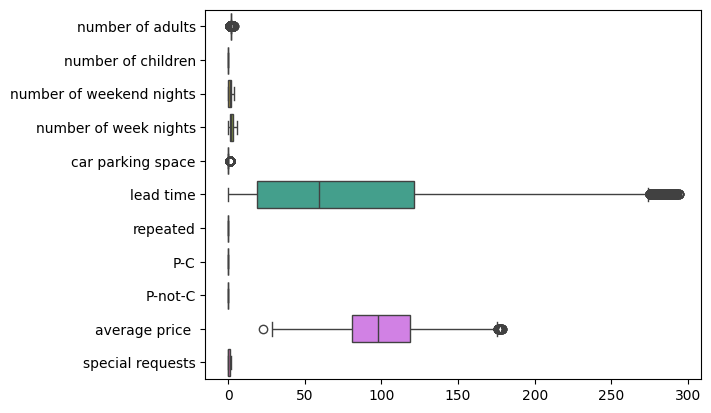

In [11]:
sns.boxplot(data=data, orient='h')

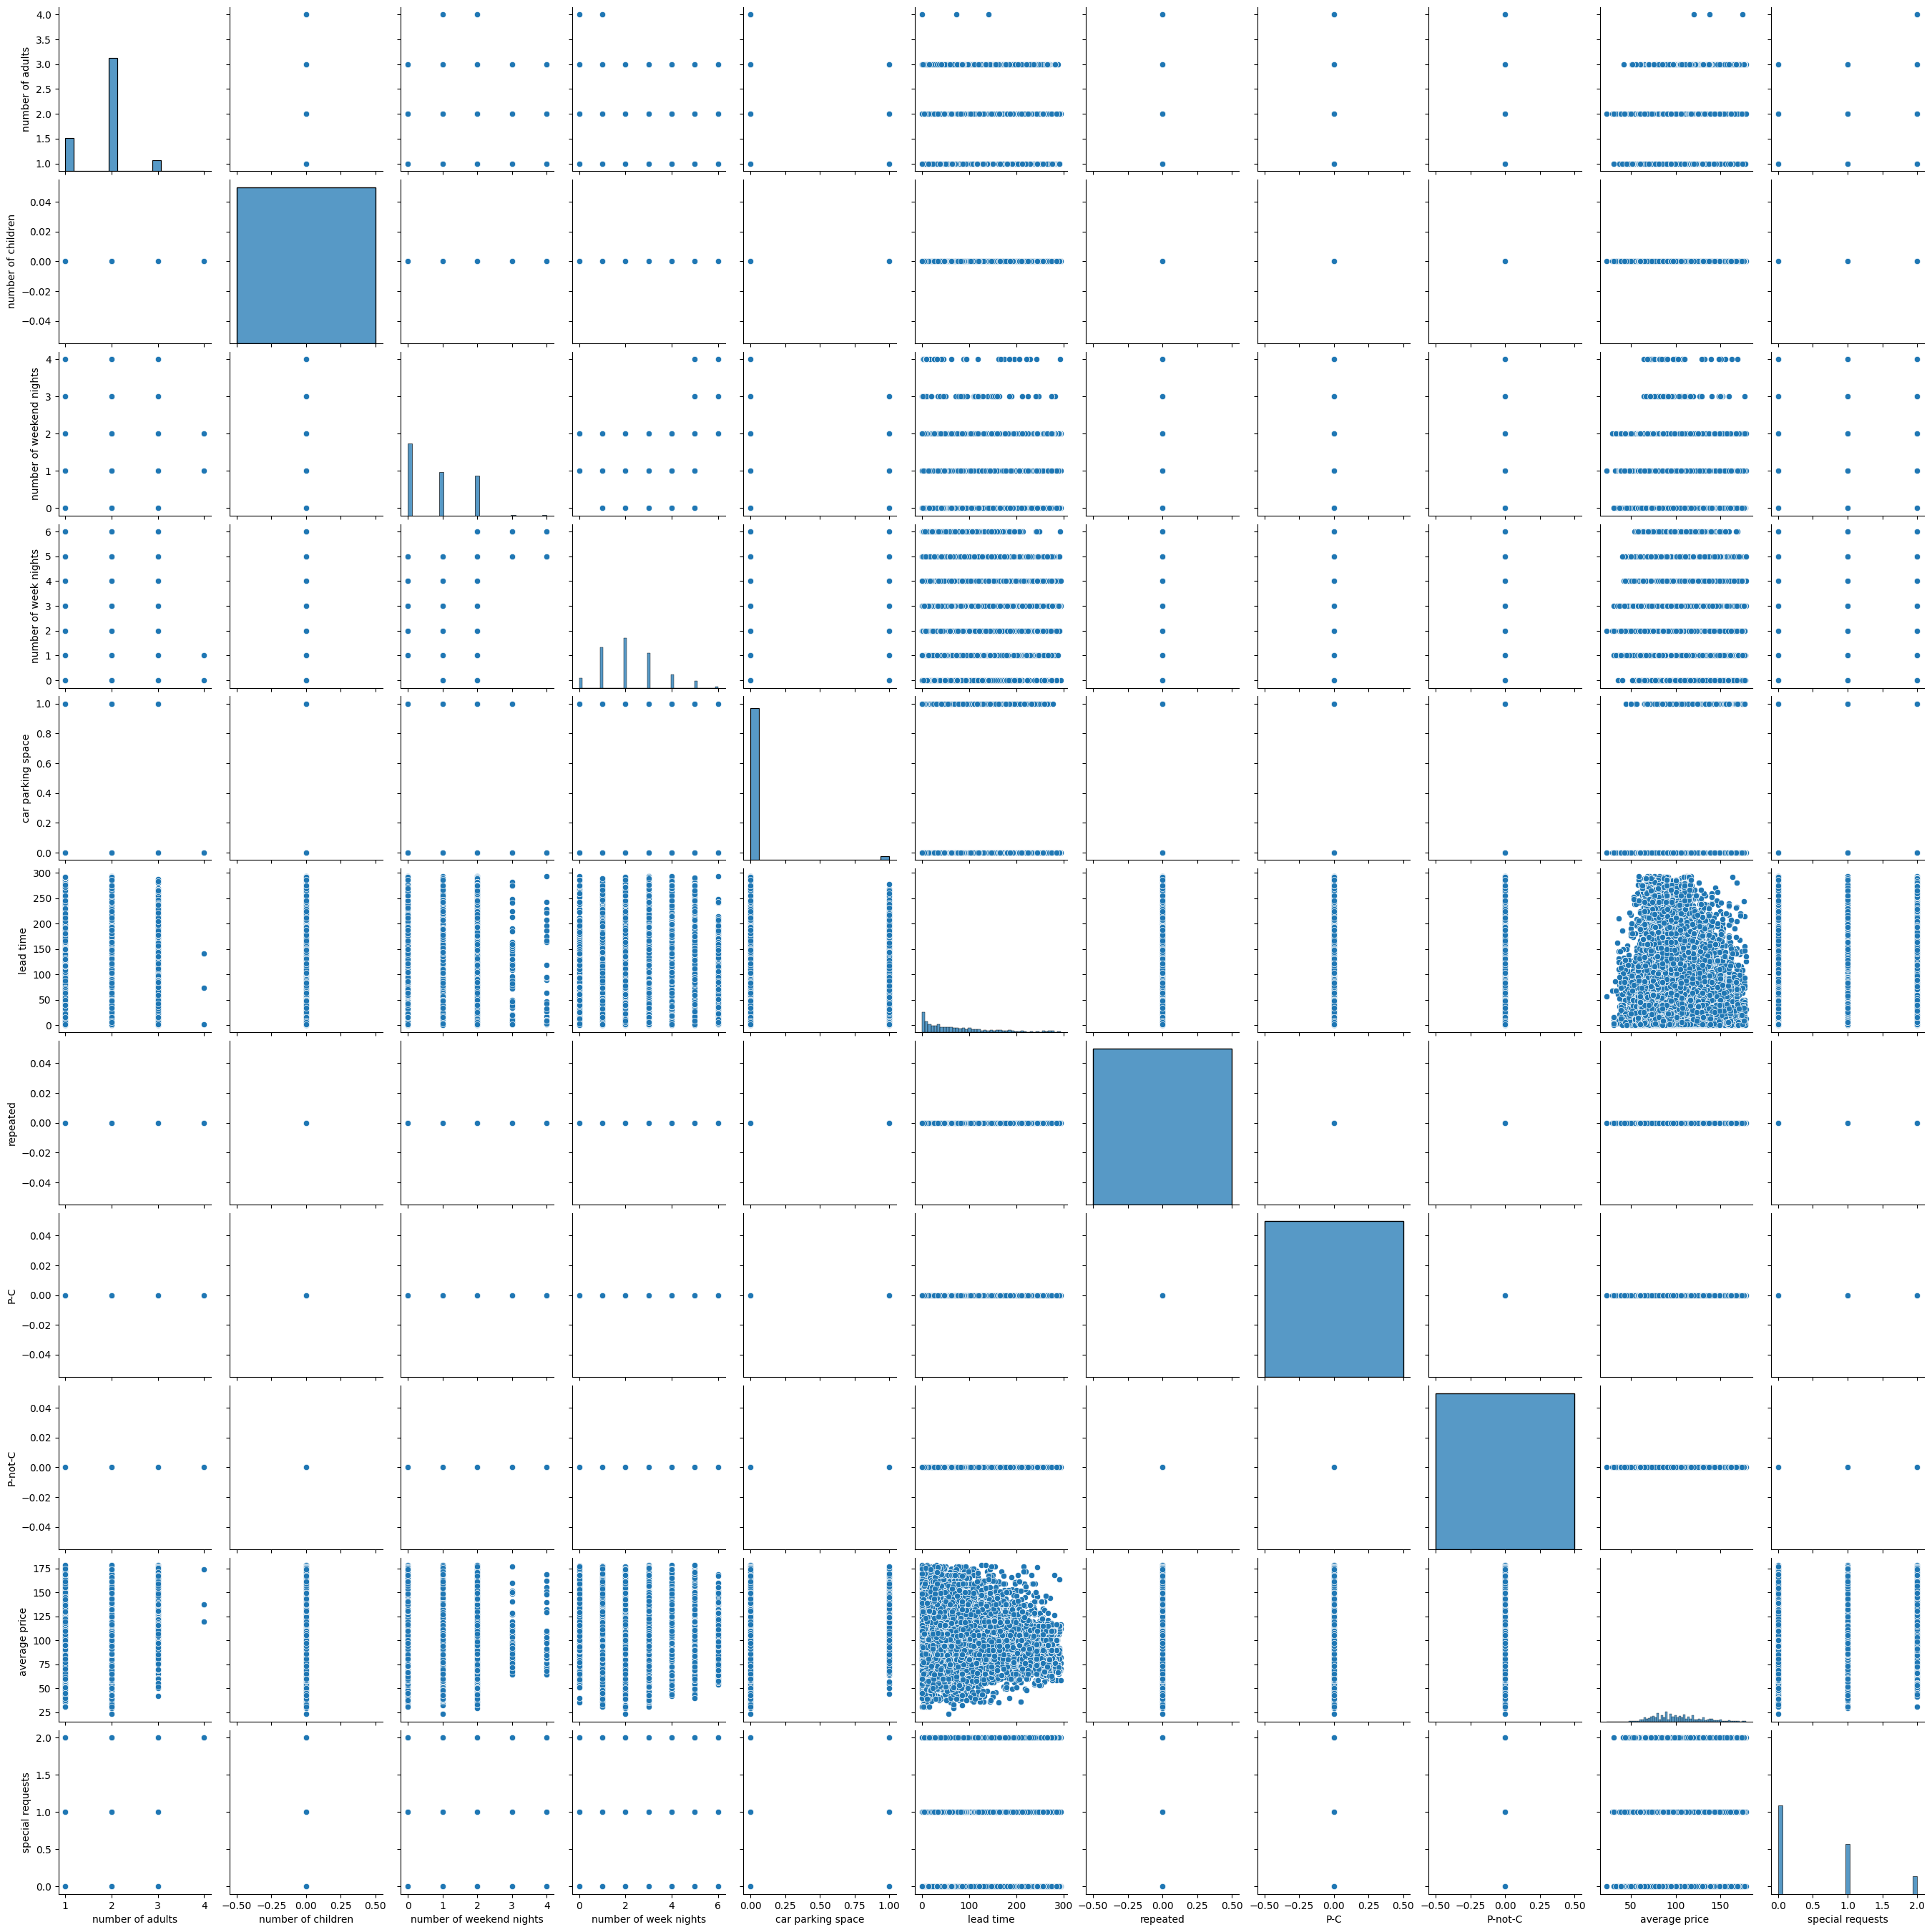

In [ ]:
sns.pairplot(data)

In [12]:
data.columns

Index(['number of adults', 'number of children', 'number of weekend nights',
       'number of week nights', 'type of meal', 'car parking space',
       'room type', 'lead time', 'market segment type', 'repeated', 'P-C',
       'P-not-C', 'average price ', 'special requests', 'date of reservation'],
      dtype='object')

In [31]:
data = data.rename(columns={ 'number of adults'         : 'number_of_adults',
                             'number of children'       : 'number_of_children',
                             'type of meal'             : 'type_of_meal',
                             'car parking space'        : 'car_parking_space',
                             'room type'                : 'room_type',
                             'market segment type'      : 'market_segment_type',
                             'lead time'                : 'lead_time',
                             'average price '           : 'average_price',
                             'special requests'         : 'special_requests',
                             'date of reservation'      : 'date_of_reservation',
                             'number of week nights'    : 'number_of_week_nights',
                             'number of weekend nights' : 'number_of_weekend_nights'
                           })

In [32]:
label_encoder = preprocessing.LabelEncoder()

In [33]:
data['type_of_meal']= label_encoder.fit_transform(data['type_of_meal'])
data['room_type']= label_encoder.fit_transform(data['room_type'])
data['market_segment_type']= label_encoder.fit_transform(data['market_segment_type'])

In [16]:
print(data['type_of_meal'].unique(), data['room_type'].unique(), data['market_segment_type'].unique())

[2 0 1] [0 3 4 1 5 6 2] [4 3 2 0 1]


In [17]:
d_corr = data.iloc[:,:-1].corr()

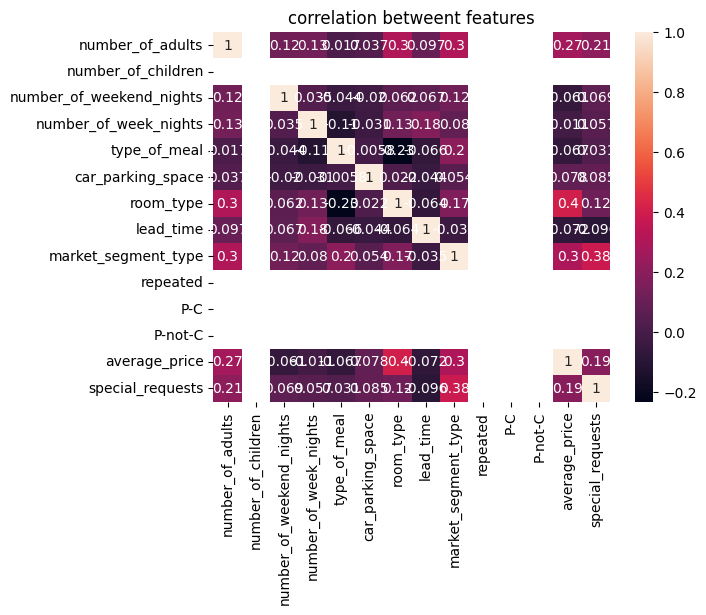

In [ ]:
sns.heatmap(d_corr, annot=True)
plt.title("correlation betweent features")
plt.show()

1. from the above graph we can see that no relation between p-c, repeated, p-not-c and all of the features
2. average price and room_type are so related 0.4
3. special_requests and market_segment_type are highly correlated  

In [38]:
X, y = data.iloc[:, 1:-2], data.iloc[:, -1]

In [39]:
len(X),len(y)

(29739, 29739)

In [40]:
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [41]:
knn = KNeighborsClassifier(4)

knn.fit(x_train, y_train)
y_pred = knn.predict(x_test)
acc = accuracy_score(y_test, y_pred)

print(acc)

0.7809347679892401


In [42]:
log_reg = LogisticRegression(max_iter=90)

log_reg.fit(x_train, y_train)

y_pred_log_reg = log_reg.predict(x_test)

accuracy_log_reg = accuracy_score(y_test, y_pred_log_reg)
print(f"Logistic Regression Accuracy: {accuracy_log_reg:.2f}")

Logistic Regression Accuracy: 0.77


/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [43]:
# SVM
svm = SVC()

svm.fit(x_train, y_train)

y_pred_svm = svm.predict(x_test)

accuracy_svm = accuracy_score(y_test, y_pred_svm)

In [45]:
accuracy_svm

0.7562205783456624

In [44]:
# tree
tree = DecisionTreeClassifier()

tree.fit(x_train, y_train)

y_pred_tree = tree.predict(x_test)

accuracy_tree = accuracy_score(y_test, y_pred_tree)

In [46]:
accuracy_tree

0.8451580363147276